In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
import nltk
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix

%matplotlib inline

In [2]:
#nltk.download('punkt')

In [3]:
data = pd.read_csv("output_merged_25oct.csv", encoding='latin-1')
data.head()

,COMPANY,COUNTRY,DISTRIBUTOR,ARTICLE ID,MODEL NUMBER,ARTICLE NAME,SUBBRAND,SPORTS CATEGORY,PRODUCT DIVISION,PRODUCT GROUP,...,CURRENT PRICE IN EUR,INITIAL PRICE IN SELECTED CURRENCY,CURRENT PRICE IN SELECTED CURRENCY,SELECTED CURRENCY,PRODUCT INTRODUCTION DATE,DISCOUNTED SINCE,PRODUCT EXIT DATE,PRODUCT DESCRIPTION,PRODUCT URL,IMAGE-SERVER URL
0,Nike,USA,Own eCom,837786-603,837786,KD 8 'Aunt Pearl' Premium Big Kids' Basketball...,Performance,Basketball,Footwear,Performance Footwear,...,56.5239,121.80,56.5239,EUR,2/29/2016,11/9/2016,9/18/2017,DYNAMIC VERSATILITY. INSPIRED STYLE.; The KD 8...,https://store.nike.com/us/en_us/pd/kd-8-aunt-p...,http://usporamap287.am.adsint.biz/zoomimages/1...
1,Nike,USA,Own eCom,810455-421,810455,LeBron 13 Transportation Kids' Adjustable Hat,Sport Inspired,Lifestyle,Accessories,Headwear,...,17.3739,24.36,17.3739,EUR,2/29/2016,4/4/2016,5/2/2016,LEBRON TRANSPORTATION HAT The LeBron 13 Transp...,http://store.nike.com/us/en_us/pd/lebron-13-tr...,http://usporamap287.am.adsint.biz/zoomimages/1...
2,Nike,USA,Own eCom,807940-010,807940,Nike SB Cherry Blossom Perforated Trucker Hat,Sport Inspired,Skate,Accessories,Headwear,...,27.8400,27.84,27.8400,EUR,2/29/2016,Not discounted yet,3/21/2016,BREATHABLE COMFORT The Nike SB Cherry Blossom ...,http://store.nike.com/us/en_us/pd/sb-cherry-bl...,http://usporamap287.am.adsint.biz/zoomimages/1...
3,Nike,USA,Own eCom,749502-100,749502,Nike Cortez Big Kids' Shoe,Sport Inspired,Lifestyle,Footwear,Sport Inspired Footwear,...,39.1239,52.20,39.1239,EUR,2/29/2016,2/9/2017,4/10/2017,"A CLASSIC, REBORN. The Nike Cortez BigÂ Kids' ...",http://store.nike.com/us/en_us/pd/cortez-big-k...,http://usporamap287.am.adsint.biz/zoomimages/1...
4,Nike,USA,Own eCom,746735-404,746735,Nike Golf AW84 OX Adjustable Hat,Performance,Golf,Accessories,Headwear,...,17.3739,20.88,17.3739,EUR,2/29/2016,6/30/2016,10/10/2016,PREMIUM LOOK. LIGHTWEIGHT FIT. The Nike Golf A...,http://store.nike.com/us/en_us/pd/golf-aw84-ox...,http://usporamap287.am.adsint.biz/zoomimages/1...


In [77]:
#data.loc[data["COUNTRY"]=="Japan"]

In [4]:
data.isnull().sum()

COMPANY                                    0
COUNTRY                                    0
DISTRIBUTOR                                0
ARTICLE ID                                 0
MODEL NUMBER                               0
ARTICLE NAME                              19
SUBBRAND                                   0
SPORTS CATEGORY                            0
PRODUCT DIVISION                           0
PRODUCT GROUP                              0
PRODUCT TYPE                               0
FRANCHISE                                 20
TECHNOLOGIES                          146388
COLOUR GROUP                               0
COLOUR                                  7285
GENDER                                     0
AGE GROUP                                  0
CONSUMER RATING                            0
INITIAL PRICE IN LOCAL CURRENCY            0
CURRENT PRICE IN LOCAL CURRENCY            0
LOCAL CURRENCY                             0
INITIAL PRICE IN EUR                       0
CURRENT PR

In [5]:
data.COUNTRY.unique()

array(['USA', 'Germany', 'Japan'], dtype=object)

In [78]:
data.COUNTRY.value_counts()

USA        108341
Germany    100958
Japan       61866
Name: COUNTRY, dtype: int64

In [12]:
data['AGE GROUP'].unique()

array(['Youth', 'Adult', 'Babys/Infants', 'Little Kids'], dtype=object)

In [13]:
# Filtering US and UK
#data = data.loc[data["language"].isin(['de-DE'])]

In [14]:
#data.group.unique()

In [15]:
data_req = data.loc[:,["COMPANY", "COUNTRY", "ARTICLE NAME","AGE GROUP", "PRODUCT DESCRIPTION", "PRODUCT URL"]]

In [16]:
data_req = data_req.drop_duplicates()

In [17]:
len(data_req)

268665

In [18]:
data_req_x = data_req.loc[:,["COMPANY", "COUNTRY", "ARTICLE NAME", "PRODUCT DESCRIPTION", "PRODUCT URL"]]
data_req_y = data_req.loc[:, ["AGE GROUP"]]

In [19]:
data_req_x = data_req_x.fillna("unknown")
data_req = pd.concat([data_req_x, data_req_y], axis=1)

In [20]:
len(data_req)

268665

In [21]:
data_req = data_req.dropna()

In [22]:
data_req = data_req.drop_duplicates()

In [23]:
data_req["description"]  = data_req["COMPANY"] +" " + data_req["COUNTRY"] +" " + data_req["ARTICLE NAME"] +" " + data_req["PRODUCT DESCRIPTION"]+" " + data_req["PRODUCT URL"]

In [24]:
data_req = data_req.drop(["COMPANY", "COUNTRY", "ARTICLE NAME", "PRODUCT DESCRIPTION", "PRODUCT URL"], axis = 1)

In [25]:
data_req.columns = ["subBrand", "description"]

In [26]:
data_req.subBrand.unique()

array(['Youth', 'Adult', 'Babys/Infants', 'Little Kids'], dtype=object)

In [27]:
len(data_req)

268665

In [28]:
data_req = data_req.drop_duplicates()

In [29]:
data_req.subBrand = data_req.subBrand.str.lower()
data_req.description = data_req.description.str.lower()

In [30]:
data_req.subBrand.unique()

array(['youth', 'adult', 'babys/infants', 'little kids'], dtype=object)

In [31]:
lens = data_req.description.str.len()
lens.mean(), lens.std(), lens.max()

(680.0890179219474, 432.91435582999054, 6086)

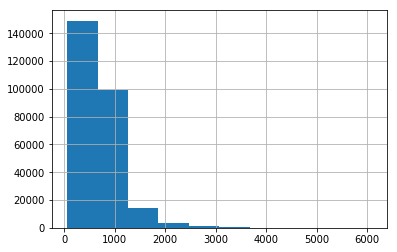

In [32]:
lens.hist();

In [33]:
data_req = data_req.dropna()

In [34]:
len(data_req)

268665

In [35]:
one_hot = pd.get_dummies(data_req.subBrand)

In [36]:
label_cols = data_req.subBrand.dropna().unique()

In [37]:
label_cols

array(['youth', 'adult', 'babys/infants', 'little kids'], dtype=object)

In [38]:
minCount = 10
subBrand_minCount = pd.DataFrame((data_req.subBrand.value_counts() > minCount).reset_index())

In [39]:
subBrand_drop = subBrand_minCount.loc[subBrand_minCount["subBrand"] == False]

In [40]:
subBrand_drop

,index,subBrand


In [41]:
label_cols = np.setdiff1d(label_cols, subBrand_drop["index"])

In [42]:
data_req = pd.concat([data_req, one_hot], axis=1)

In [43]:
import re, string
re_tok = re.compile(f'([{string.punctuation}“”¨«»®´·º½¾¿¡§£₤‘’])')
def tokenize(s): return re_tok.sub(r' \1 ', s).split()

In [44]:
description = "description"

In [45]:
data_req = data_req.drop(subBrand_drop["index"], axis = 1)

In [46]:
np.random.seed(123)
data_req_sample = data_req.sample(frac=0.7)

In [47]:
train = data_req.loc[data_req.index.isin(data_req_sample.index)]
test = data_req.loc[~data_req.index.isin(data_req_sample.index)]

In [48]:
test_subBrand = test.subBrand

In [49]:
#test_subBrand

In [50]:
train = train.drop("subBrand", axis = 1)
test = test.drop("subBrand", axis = 1)

In [51]:
# token_dict = {}
# stemmer = PorterStemmer()

# def stem_tokens(tokens, stemmer):
#     stemmed = []
#     for item in tokens:
#         stemmed.append(stemmer.stem(item))
#     return stemmed

# def tokenize(text):
#     tokens = nltk.word_tokenize(text)
#     stems = stem_tokens(tokens, stemmer)
#     return stems

In [52]:
# from stop_words import get_stop_words
# stop_words_english = get_stop_words('english')
# stop_words_german = get_stop_words('german')

In [53]:
#stop_words_english.append(stop_words_german)

In [54]:
# stop_words_english = sorted(set(map(tuple, stop_words_english)), reverse=True)

In [55]:
n = train.shape[0]
vec = TfidfVectorizer(ngram_range=(1,2), tokenizer=tokenize,
               min_df=3, max_df=0.9, strip_accents='unicode', use_idf=1,
               smooth_idf=1, sublinear_tf=1)
trn_term_doc = vec.fit_transform(train[description])
test_term_doc = vec.transform(test[description])

In [56]:
trn_term_doc, test_term_doc

(<188066x637087 sparse matrix of type '<class 'numpy.float64'>'
 	with 34479025 stored elements in Compressed Sparse Row format>,
 <80599x637087 sparse matrix of type '<class 'numpy.float64'>'
 	with 14566610 stored elements in Compressed Sparse Row format>)

In [57]:
def pr(y_i, y):
    p = x[y==y_i].sum(0)
    return (p+1) / ((y==y_i).sum()+1)

In [58]:
x = trn_term_doc
test_x = test_term_doc

In [59]:
def get_mdl(y):
    y = y.values
    r = np.log(pr(1,y) / pr(0,y))
    m = LogisticRegression(C=4, dual=True)
    x_nb = x.multiply(r)
    return m.fit(x_nb, y), r

In [60]:
from sklearn.linear_model import LogisticRegression

In [61]:
preds = np.zeros((len(test), len(label_cols)))

for i, j in enumerate(label_cols):
    print('fit', j)
    m,r = get_mdl(train[j])
    preds[:,i] = m.predict_proba(test_x.multiply(r))[:,1]

fit adult
fit babys/infants
fit little kids
fit youth


In [62]:
preds.shape

(80599, 4)

In [63]:
predictions = pd.DataFrame(preds, columns = label_cols)

In [64]:
test.index = np.arange(0, len(test))
test_subBrand.index = np.arange(0, len(test))

In [65]:
len(test)

80599

In [66]:
submid = pd.DataFrame({'description': test["description"]})
submission = pd.concat([submid, pd.DataFrame(preds, columns = label_cols)], axis=1)

In [67]:
submission.head()

,description,adult,babys/infants,little kids,youth
0,"nike usa nike cortez big kids' shoe a classic,...",0.051628,0.002148,0.071806,0.597721
1,nike germany nike performance low-cut socken f...,0.005476,0.000749,0.079204,0.763705
2,nike usa nike jr. tiempo legend vi tf kids' tu...,0.004090,0.000358,0.023745,0.818435
3,nike usa nike mercurial victory v tf kids' tur...,0.019292,0.000569,0.071985,0.086945
4,nike usa nike jr. mercurial victory v ic kids'...,0.000196,0.001116,0.061263,0.932008


In [68]:
final_pred = pd.concat([submission, test_subBrand.str.lower()],axis = 1)

In [69]:
test_subBrand.str.lower().value_counts()

adult            69103
youth             6901
little kids       2980
babys/infants     1615
Name: subBrand, dtype: int64

In [71]:
data["AGE GROUP"].value_counts()

Adult            232278
Youth             23290
Little Kids       10182
Babys/Infants      5415
Name: AGE GROUP, dtype: int64

In [72]:
final_pred["Predictions"] = final_pred[label_cols].idxmax(axis = 1)

In [73]:
from mlxtend.evaluate import confusion_matrix

y_target =    final_pred.subBrand
y_predicted = final_pred.Predictions

cm = confusion_matrix(y_target=y_target, 
                      y_predicted=y_predicted, 
                      binary=False)

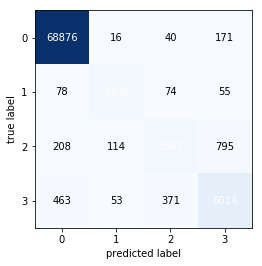

In [74]:
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_confusion_matrix
import numpy as np

fig, ax = plot_confusion_matrix(conf_mat=cm)
plt.show()

In [75]:
print(f'Accuracy Score : {accuracy_score(final_pred.subBrand, final_pred.Predictions)}')
print(f'F1 Score: {f1_score(final_pred.subBrand, final_pred.Predictions, average="macro")}')
print(f'Precision: {precision_score(final_pred.subBrand, final_pred.Predictions, average="macro")}')
print(f'Recall: {recall_score(final_pred.subBrand, final_pred.Predictions, average="macro")}')

Accuracy Score : 0.9697514857504436
F1 Score: 0.8584326166671075
Precision: 0.8806325280603269
Recall: 0.8412943405937612


In [88]:
#final_pred.to_csv("final_output_SubBrand_v4.csv", index_label=False, index=False)

In [83]:
len(final_pred)

20860

In [51]:
#test_subBrand

In [52]:
len(submission)

15062

In [54]:
#final_pred.isnull().sum()